In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('output_utf.csv')
df_clean = pd.read_csv('output_clean.csv')

print(df.shape, df_clean.shape)

(2778, 61) (2778, 47)


In [ ]:
plt.figure(figsize=(16, 8))

plt.title("Null values")

df.isnull().sum().plot(kind='bar')

plt.show()

In [35]:
df.columns

Index(['Name', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific Name', 'Quote', 'Text', 'Prey', 'Name Of Young',
       'Group Behavior', 'Fun Fact', 'Estimated Population Size',
       'Biggest Threat', 'Most Distinctive Feature', 'Other Name(s)',
       'Gestation Period', 'Habitat', 'Diet', 'Average Litter Size',
       'Lifestyle', 'Common Name', 'Number Of Species', 'Location', 'Slogan',
       'Group', 'Color', 'Skin Type', 'Top Speed', 'Lifespan', 'Weight',
       'Length', 'Age of Sexual Maturity', 'Age of Weaning', 'Litter Size',
       'Predators', 'Type', 'Height', 'Temperament', 'Age Of Independence',
       'Favorite Food', 'Distinctive Feature', 'Training', 'Main Prey',
       'Wingspan', 'Incubation Period', 'Age Of Fledgling', 'Nesting Location',
       'Migratory', 'Venomous', 'Aggression', 'Origin', 'Average Clutch Size',
       'Special Features', 'Diet for this Fish', 'Average Spawn Size',
       'Age of Molting', 'Optimum pH Level', 'Opt

## Null Before vs After Cleaning


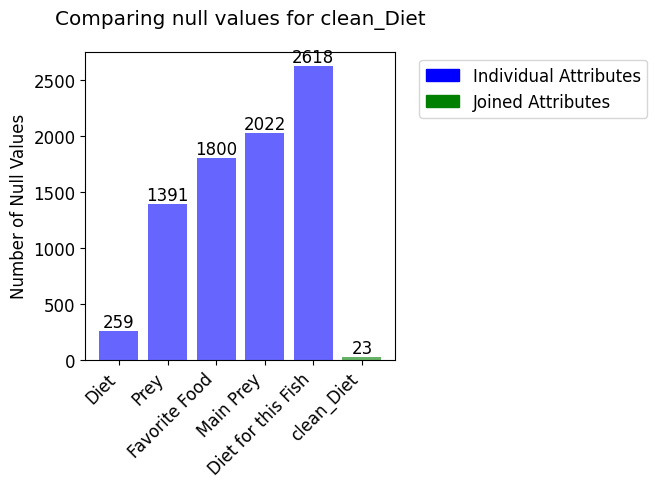

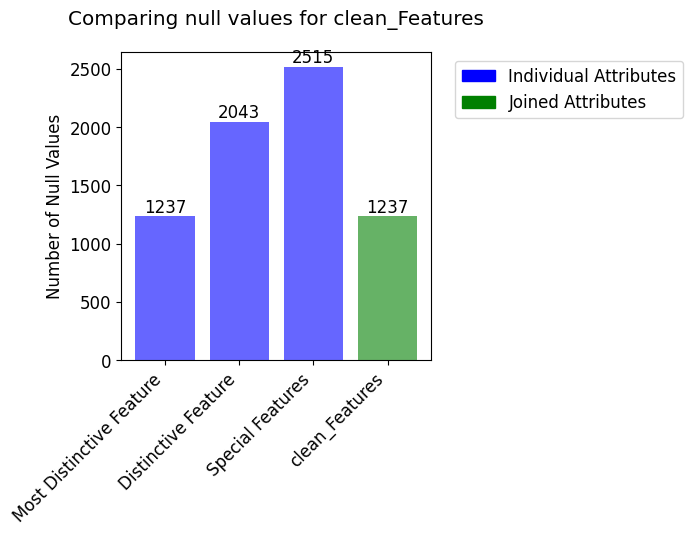

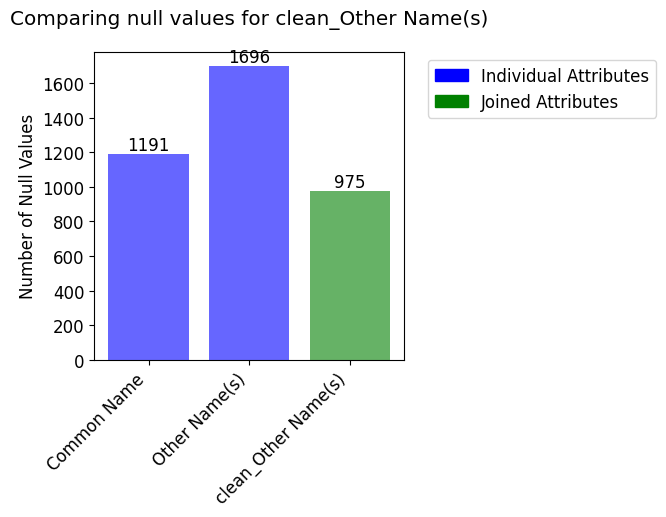

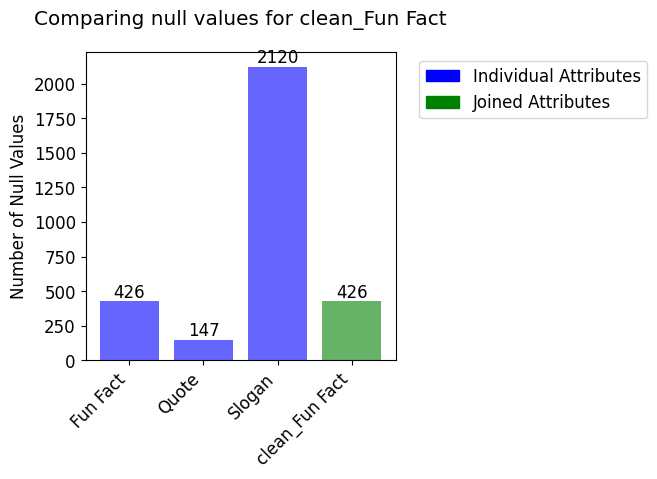

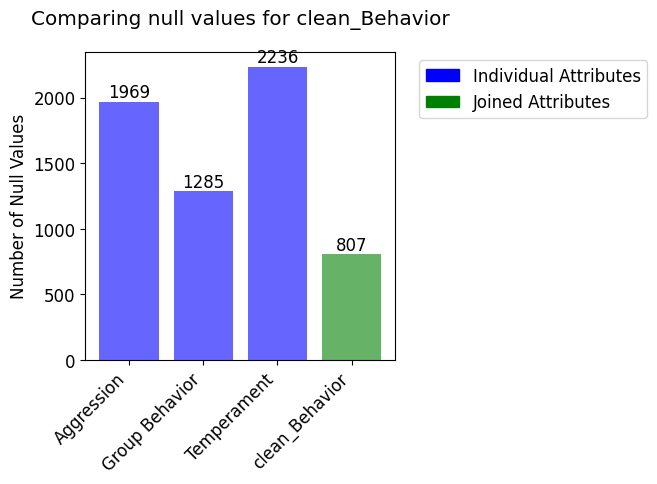

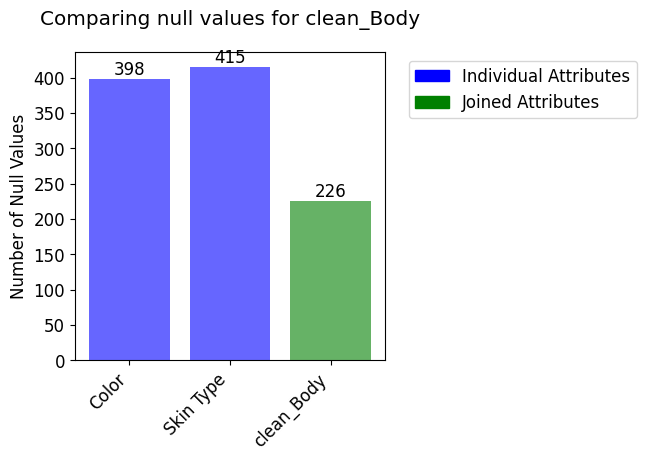

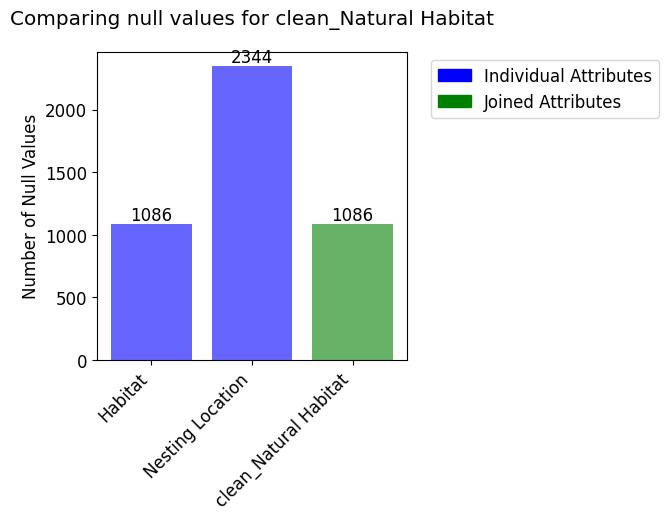

In [183]:
import matplotlib.pyplot as plt
import numpy as np

column_mappings = {
    'Diet + Prey + Favorite Food + Main Prey + Diet for this Fish': 'Diet',
    'Most Distinctive Feature + Distinctive Feature + Special Features': 'Features',
    'Common Name + Other Name(s)': 'Other Name(s)',
    'Fun Fact + Quote + Slogan': 'Fun Fact',
    'Aggression + Group Behavior + Temperament': 'Behavior',
    'Color + Skin Type': 'Body',
    'Habitat + Nesting Location': 'Natural Habitat'
}

titles = [
    'Diet', 'Features', 'Other Name(s)', 'Fun Fact', 'Behavior', 'Body', 'Natural Habitat'
]

# Iterate over each column mapping and generate a new plot
for i, (line, mapped_column) in enumerate(column_mappings.items()):
    # Create a new figure for each plot
    plt.figure(figsize=(4, 4))

    # Calculate the number of null values before joining
    null_counts_before = df[line.split(' + ')].isnull().sum()
    # Calculate the number of null values after joining
    null_counts_after = df_clean[mapped_column].isnull().sum()

    null_counts_before[f'clean_{mapped_column}'] = null_counts_after

    # Create a bar plot for each line with different colors
    colors = ['blue' if col != f'clean_{mapped_column}' else 'green' for col in null_counts_before.index]
    x_positions = np.arange(len(null_counts_before))
    plt.bar(x_positions, null_counts_before.values, color=colors, alpha=0.6)
    plt.title(f'Comparing null values for clean_{titles[i]}', pad=20)  # Add space between title and plot
    plt.ylabel('Number of Null Values')

    # Set the x-axis labels
    plt.xticks(x_positions, null_counts_before.index, rotation=45, ha='right')

    for x, y in zip(x_positions, null_counts_before.values):
        plt.text(x, y, str(y), ha='center', va='bottom')

    legend_labels = {
        'blue': 'Individual Attributes',
        'green': 'Joined Attributes'
    }
    handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in legend_labels.items()]
    plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.05, 1))

    # Display the plot
    plt.show()


## Aggression

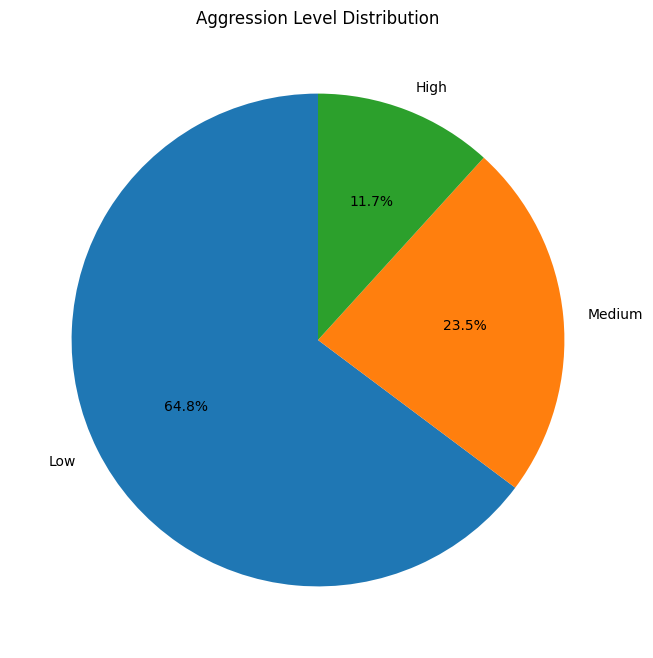

In [65]:
plt.figure(figsize=(8, 8))

df['Aggression'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Aggression Level Distribution')
plt.ylabel("")
plt.show()

## Temperament

In [76]:
import re

temp_count = {}
pattern = r",|and"
for elem in df['Temperament'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in temp_count):
            temp_count[prey.strip()] = 1
        else:
            temp_count[prey.strip()] += 1


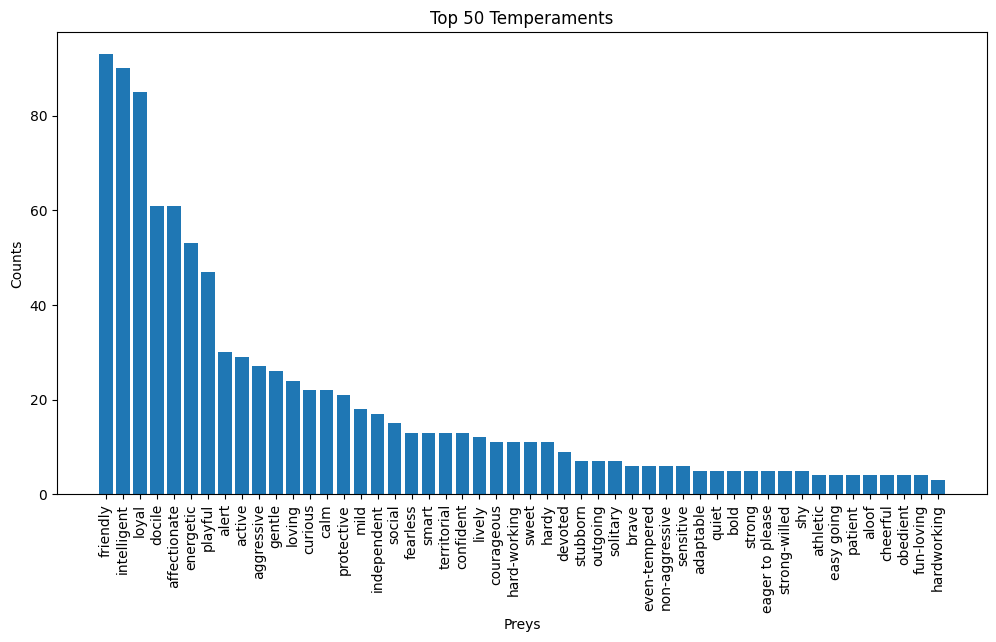

In [78]:
temperament_data = sorted(temp_count.items(), key=lambda x: x[1], reverse=True)
top = 50

temp_values = [item[0] for item in temperament_data[:top]]
temp_counts = [item[1] for item in temperament_data[:top]]

plt.figure(figsize=(12, 6))

# Plot for preys
plt.bar(temp_values, temp_counts)
plt.title(f'Top {top} Temperaments')
plt.xlabel('Preys')
plt.ylabel('Counts')
plt.tick_params(axis='x', rotation=90)

## Prey/Predator

In [79]:
import re

preys_count = {}
pattern = r",|and"
for elem in df['Prey'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in preys_count):
            preys_count[prey.strip()] = 1
        else:
            preys_count[prey.strip()] += 1

predator_count = {}
pattern = r",|and"
for elem in df['Predators'].str.lower():
    if(pd.isna(elem)): continue
    for prey in re.split(pattern, elem):
        if not prey.strip(): 
            continue
        if(prey.strip() not in predator_count):
            predator_count[prey.strip()] = 1
        else:
            predator_count[prey.strip()] += 1

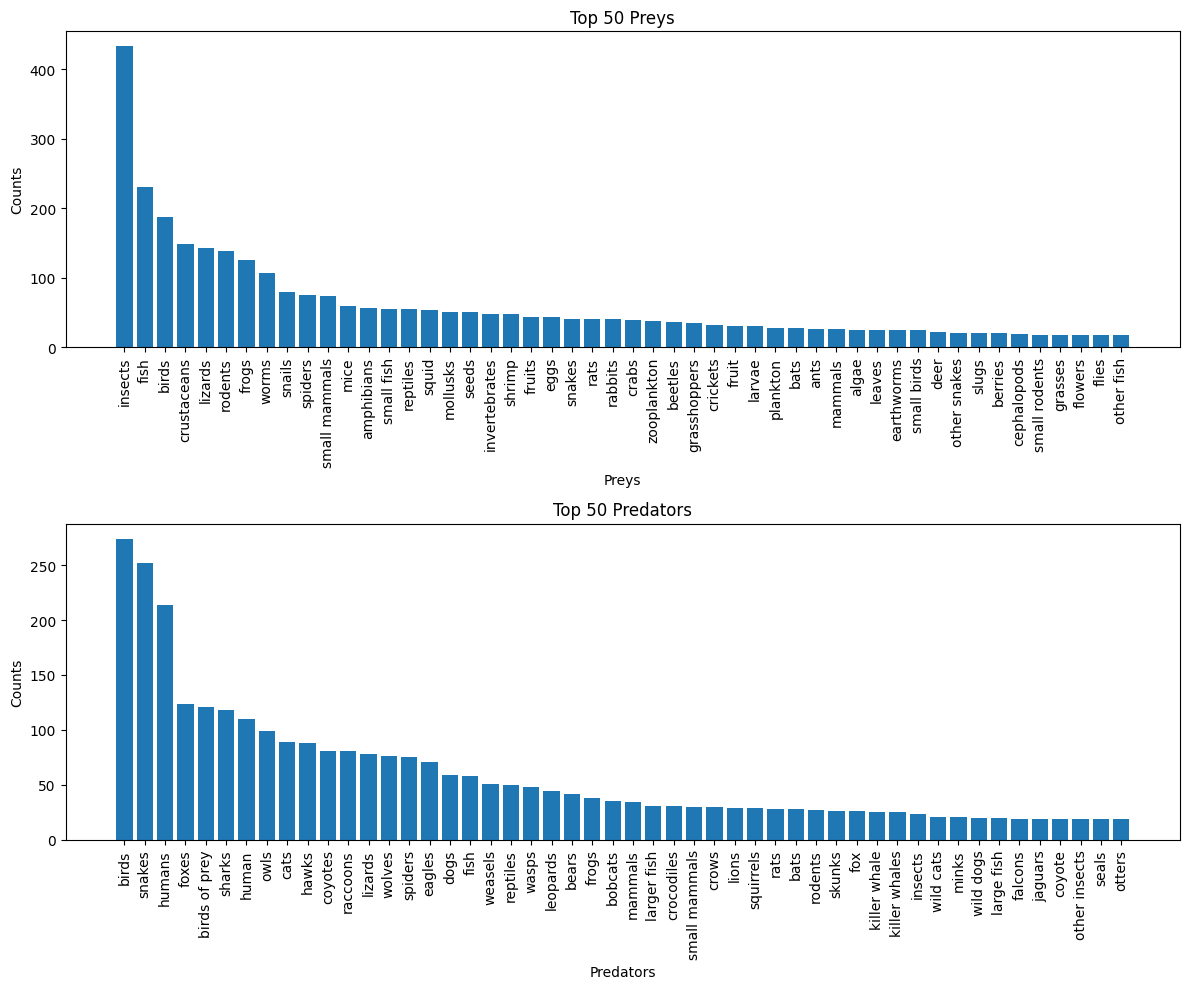

In [28]:
preys_data = sorted(preys_count.items(), key=lambda x: x[1], reverse=True)
predator_data = sorted(predator_count.items(), key=lambda x: x[1], reverse=True)

top = 50

preys_values = [item[0] for item in preys_data[:top]]
preys_counts = [item[1] for item in preys_data[:top]]

predator_values = [item[0] for item in predator_data[:top]]
predator_counts = [item[1] for item in predator_data[:top]]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for preys
ax1.bar(preys_values, preys_counts)
ax1.set_title(f'Top {top} Preys')
ax1.set_xlabel('Preys')
ax1.set_ylabel('Counts')
ax1.tick_params(axis='x', rotation=90)

# Plot for predators
ax2.bar(predator_values, predator_counts)
ax2.set_title(f'Top {top} Predators')
ax2.set_xlabel('Predators')
ax2.set_ylabel('Counts')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

## Biggest Threat

In [111]:
threat_count = {}

pattern = r",|and|\n"
for elem in df['Biggest Threat'].str.lower():
    if(pd.isna(elem)): continue
    for threat in re.split(pattern, elem):
        if not threat.strip(): 
            continue
        if(threat.strip() not in threat_count):
            threat_count[threat.strip()] = 1
        else:
            threat_count[threat.strip()] += 1

threat_count = pd.Series(threat_count)

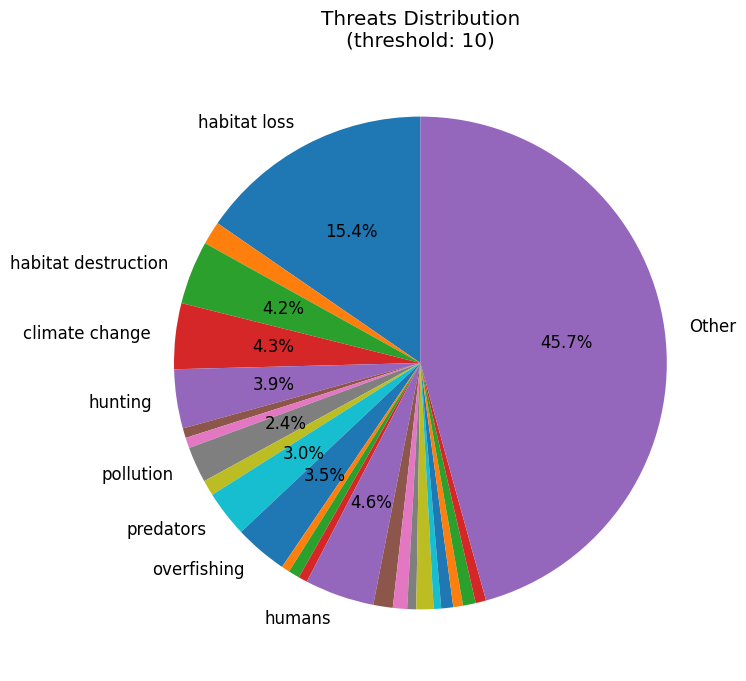

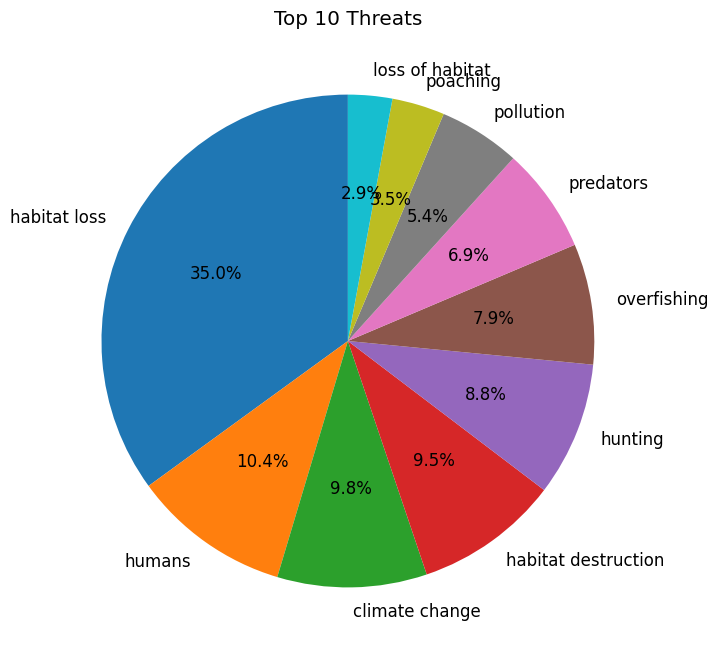

In [114]:
threshold = 10
percentage_threshold = 2
top_N = 10

grouped_counts = threat_count[threat_count >= threshold]
grouped_counts['Other'] = threat_count[threat_count < threshold].sum()

plt.figure(figsize=(8, 8))

plt.pie(
    grouped_counts.values,
    labels=['' if pct < percentage_threshold else label for label, pct in zip(grouped_counts.index, grouped_counts / grouped_counts.sum() * 100)],
    autopct=lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else '',  # Display percentages for >=5% slices
    startangle=90,
)
plt.title(f'Threats Distribution\n(threshold: {threshold})')

plt.show()


top_N_counts = threat_count.nlargest(top_N)

plt.figure(figsize=(8, 8))

plt.pie(
    top_N_counts.values,
    labels=top_N_counts.index,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title(f'Top {top_N} Threats')
# Show the subplots
plt.show()



## Genus

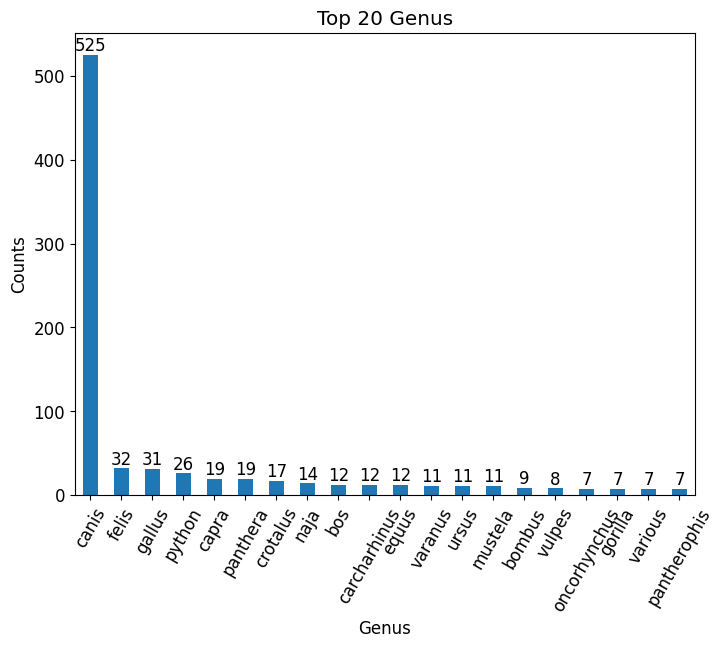

In [116]:
genus_top  = 20

value_counts = df_clean['Genus'].str.lower().value_counts()

plt.figure(figsize=(8, 6))

ax = value_counts.head(genus_top).plot(kind='bar')

plt.xticks(rotation=60)

plt.xlabel('Genus')
plt.ylabel('Counts')
plt.title(f'Top {genus_top} Genus')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.show()


## Genus Canis - Scientific names

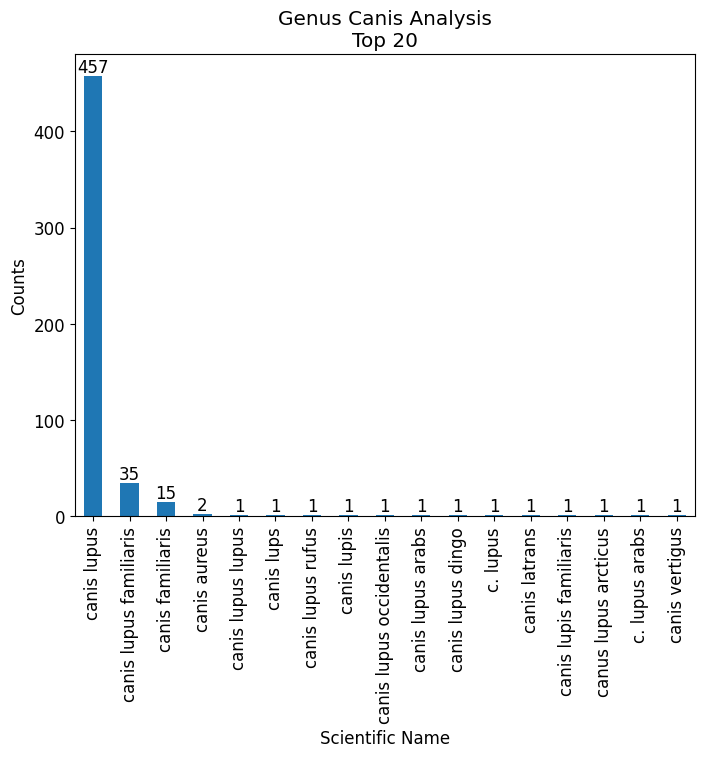

In [117]:
value_counts = df_clean[df_clean['Genus'] == 'Canis']['Scientific Name'].str.lower().value_counts()

scientific_names_top = 20

plt.figure(figsize=(8, 6))

ax = value_counts.head(scientific_names_top).plot(kind='bar')

plt.xticks(rotation=90)

plt.xlabel('Scientific Name')
plt.ylabel('Counts')
plt.title(f'Genus Canis Analysis\nTop {scientific_names_top}')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')


# Show the plot
plt.show()

## Phylum

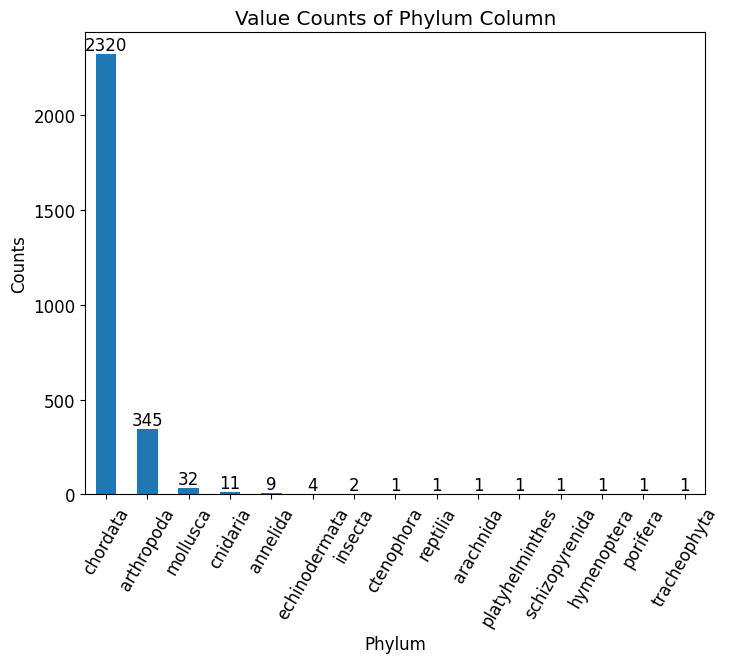

In [119]:
value_counts = df_clean['Phylum'].str.lower().value_counts()

plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar')

plt.xticks(rotation=60)

plt.xlabel('Phylum')
plt.ylabel('Counts')
plt.title('Value Counts of Phylum Column')

for i, v in enumerate(value_counts.head(genus_top)):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

## Diet

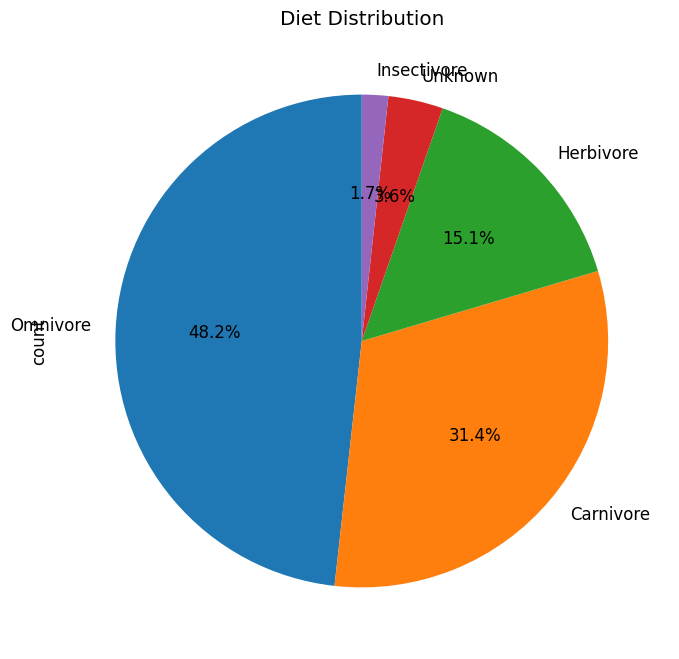

In [120]:
diet_category = df_clean['Diet'].apply(lambda elem: elem.split(' ')[0] if pd.notna(elem) else 'Unknown').apply(lambda x: x if x.endswith('ore') else "Unknown")

plt.figure(figsize=(8, 8))  # Set the figure size

diet_category.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Diet Distribution')

plt.show()